## Decision Boundaries

This script is to illustrate the representational capacity of a MLP with one hidden layer concerning possible decision boundaries that can be produced using - for simplicity - the Heaviside activation function. It is an extension of the exercise `3.1.decision_boudaries_stud.ipynb` at the end of chapter 4.3.1 in the lecture notes to a multiclass problem.

In [137]:
import numpy as np
import matplotlib.pyplot as plt


## Helper functions

In [138]:
def create_data(centres, sigmas, num_points, label_list, seed, centre_sigma = 2):
    """
    Arguments:
    centres -- list of points in 2D used as centres
    sigmas -- list of std 2D for selection of points around centres
    num_points -- number of points to select for each centre
    label_list -- list of labels (some sets may belong to same label)
    seed -- set the random seed to have identical results
    centre_sigma -- some randomness added to centres

    Returns:
    point_list, labels
    """

    np.random.seed(seed)  # set the seet

    #we add some noise to the set centre 
    centres = centres + centre_sigma*np.random.normal(0, 1, centres.shape)

    point_list = np.zeros((centres.shape[0] * num_points, centres.shape[1]))
    labels = np.zeros((centres.shape[0] * num_points),dtype=int)

    for i0 in np.arange(centres.shape[0]):
        point_list[i0 * num_points:(i0+1)*num_points,:] = centres[i0,:].reshape(1, centres.shape[1]) + \
                    sigmas[i0,:].reshape(1, centres.shape[1])*2*(np.random.normal(0,1,(num_points, centres.shape[1]))-0.5)

        labels[i0 * num_points:(i0+1)*num_points] = label_list[i0]

    return point_list, labels


def plot_data(point_list, labels, n_vec=[], b_vec=[], distance=2):
    """
    Arguments:
    point_list -- list of points
    labels -- corresponding labels
    n_vec -- list of normal vector of the decision boundaries to plot
    b_vec -- list of biases of the decision boundaries to plot
    """
    col = ['r+','g+','b+','c+','m+','y+']
    col_line = ['r-','g-','b-','c-','m-','y-']
    
    labels_unique = np.unique(labels)
    
    for i0 in np.arange(labels_unique.size):
        plt.plot(point_list[labels==labels_unique[i0],0],point_list[labels==labels_unique[i0],1],col[labels_unique[i0]])
              
    if len(n_vec) > 0:
        for i0 in range(n_vec.shape[1]):
            x0 = -n_vec[:,i0]*b_vec[0,i0]
            dt = np.array([-n_vec[1,i0],n_vec[0,i0]])
            xp = np.zeros((2,2))
            xp[0] = x0-0.5*distance*dt
            xp[1] = x0+0.5*distance*dt
    
            plt.plot(xp[:,0],xp[:,1], col_line[i0])

    plt.show()

### Create a set of points corresponding to different categories in 2D plane


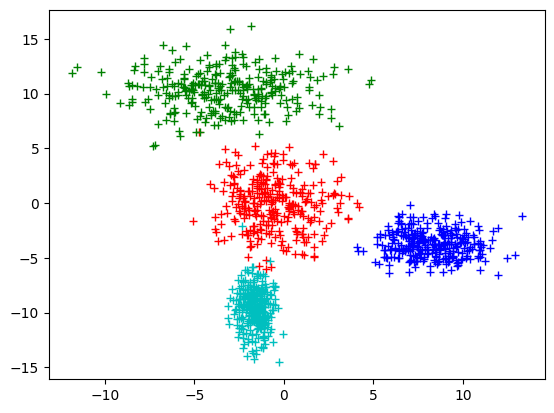

In [139]:
### START YOUR CODE ### 
# choose any suitable (allowed) inter value 

#allows to reproduce the results
seed=4
### END YOUR CODE ### 

#you can choose only part of the defined centre pointes
num_centres = 4

#number of points (for each centre)
num_points = 300

#choose the centre points of the sets (some randomness is added in create_data)
centres = np.array([[0,0],[0,10],[10,0],[0,-10], [-10,0]]) 

#choose the labels (in a row [0,1, ..]) (can be identical to "fuse" sets) 
labels = np.array([0,1,2,3,4]) 

#choose the sigmas (x,y) to randomise the sets
sigmas = .3*np.array([[3,4],[5,3],[3,2],[1,3],[3,6]])

#create data and plot it
x,y = create_data(centres[:num_centres,:], sigmas[:num_centres,:], num_points, labels, seed)

plot_data(x, y)

### Class Multi-Layer Perceptron

Constructor receives $weights$ and biases. We create one hidden and the output layer. Therefore weights and biases are lists of length two. The weight list has two entries: a `(2,k)`-shaped vector - `k` being the number of hidden neurons - and a `(k,n)`-shaped vector, `n` being the number of outputs. The bias list has two entries: a `(1,k)`-shaped vector and a `(1,n)`-shaped vector. Using the $propagate()$ method a prediction on a set of points $x$ - a `(n,2)`-vector - can be done. The method $calc\_error()$ gives back the error of the prediction $y\_pred$ compared to the ground truth $y$.

In [140]:
class MultiLayerPerceptron:
    """
    simple MLP class (without optimisation)
    """
     
    def __init__(self, weights, bias):
        """
        constructor

        Arguments:
        weights -- a list of weight vectors of shape (2,k) and (k,1)
        bias -- a list of bias vectors of shape (1,k) and (1)
        """
        
        self.w1 = weights[0]
        self.b1 = bias[0]     

        self.w_out = weights[1]
        self.b_out = bias[1]     
    
    def propagate(self, x):
        """
        predicted outcome for x
        """
        #hidden layer
        z1 = x @ self.w1 + self.b1
        a1 = 1*(0 <= z1)
        #output layer
        z_out = a1 @ self.w_out + self.b_out
        y_pred = 1*(0 <= z_out)
                    
        return y_pred

    
    def calc_error(self, y_pred, y):
        """
        get error information
        """
        m = y.shape[0]
         
        error = 1-np.sum(y_pred == y.reshape(y_pred.shape)) / m 

        return error

### Sample execution of class Multi-Layer Perceptron

In [141]:
### START YOUR CODE ### 

w1 = np.array([[0, 1], [-1, 1.9],[-1, -1]]).T
b1 = np.array([[-6, 8, -7]])
w_out = np.array([[0, 0,0],[1, 0,0],[0, 1,0],[0, 0,1]]).T
b_out = np.array([-0.5])

### END YOUR CODE ###

weights = [w1, w_out]
bias = [b1, b_out]

MLP = MultiLayerPerceptron(weights, bias)

y_pred = MLP.propagate(x)
y_pred_argmax = np.argmax(y_pred,axis=1)
print(MLP.calc_error(y_pred_argmax,y))

0.4933333333333333


### Plot the results

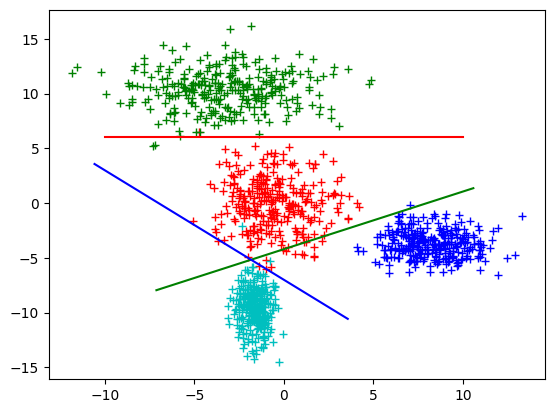

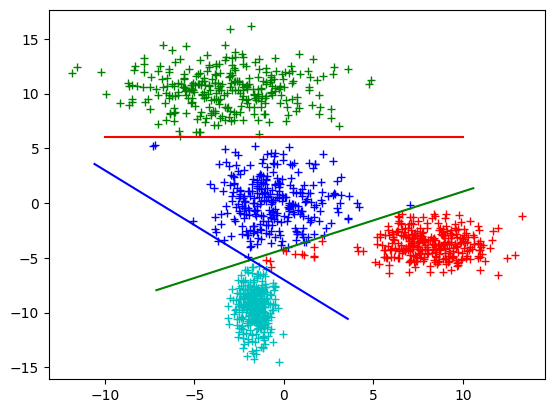

In [142]:
norm_W = np.sqrt(np.sum(MLP.w1**2,0))
n_vec = MLP.w1/norm_W
b_vec = MLP.b1/norm_W
plot_data(x, y, n_vec, b_vec,20)
plot_data(x, y_pred_argmax, n_vec, b_vec,20)

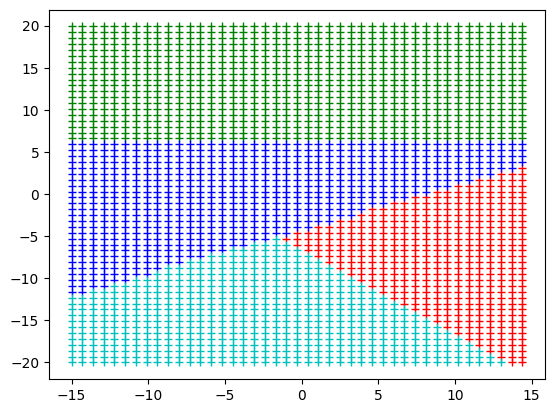

In [143]:
step = 0.7
grid = np.mgrid[-15:15:step,-20:20:step]

grid_points = grid.reshape(2,int(grid.size/2)).T

y_pred = MLP.propagate(grid_points)
y_pred_argmax = np.argmax(y_pred,axis=1)
plot_data(grid_points, y_pred_argmax, n_vec, b_vec,0)